In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [37]:
import pandas as pd

# Provide the correct file path
file_path = "/content/drive/MyDrive/amazon review system project/Reviews.csv"

# Load CSV into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

In [38]:
df.shape

(568454, 10)

In [39]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

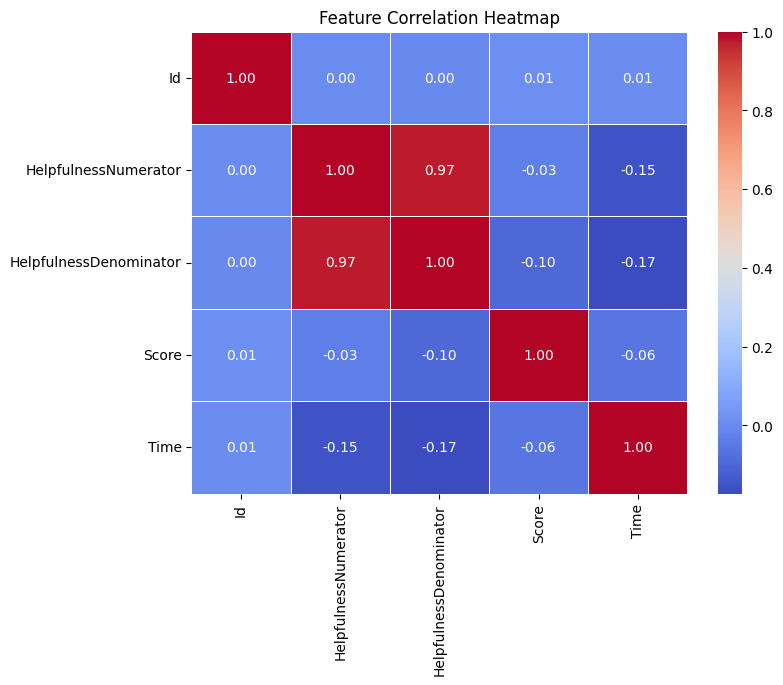

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (Replace this with your actual data loading method)
# df = pd.read_csv("your_file.csv")

# Selecting only numerical columns for correlation analysis
num_features = ['Id', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']
corr_matrix = df[num_features].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [41]:
import pandas as pd

# Compute correlation of all features with 'Score'
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])  # Select only numerical columns
corr_with_target = numerical_df.corr()['Score'].abs().sort_values(ascending=False)

# Display top features (excluding 'Score' itself)
top_features = corr_with_target.drop('Score').head(5)
print("Top Features Based on Correlation:\n", top_features)

Top Features Based on Correlation:
 HelpfulnessDenominator    0.097986
Time                      0.062760
HelpfulnessNumerator      0.032590
Id                        0.010706
Name: Score, dtype: float64


In [42]:
import plotly.express as px

# Check if 'Score' column exists
if "Score" in df.columns:
    fig = px.histogram(df, x="Score")
    fig.update_traces(marker_color="turquoise", marker_line_color='rgb(8,48,107)',
                      marker_line_width=1.5)
    fig.update_layout(title_text='Product Score')
    fig.show(renderer="colab")  # Use this for Google Colab
else:
    print("Column 'Score' not found in the dataset.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


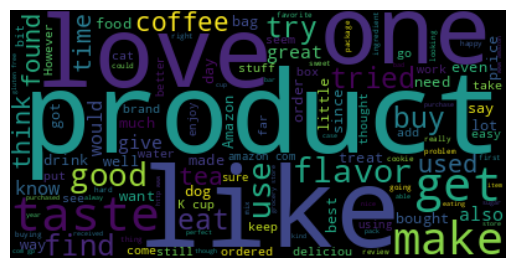

In [43]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download the 'stopwords' dataset
nltk.download('stopwords')

# Creating Stopwords list
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [44]:
df = df[df['Score'] != 3]
df['sentiment'] = df['Score'].apply(lambda rating : +1 if rating > 3 else -1)

In [45]:
df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   sentiment  
0          1  
1         -1  
2          1  
3         -1  
4          1

<ipython-input-46-99d18d3355e6>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




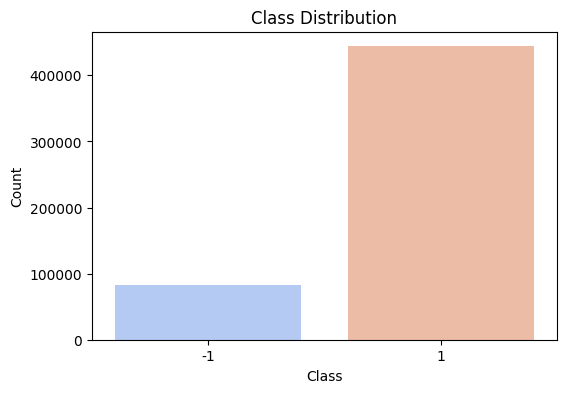

In [46]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette='coolwarm')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [47]:
# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == -1]

In [48]:
positive = positive.dropna()
negative = negative.dropna()

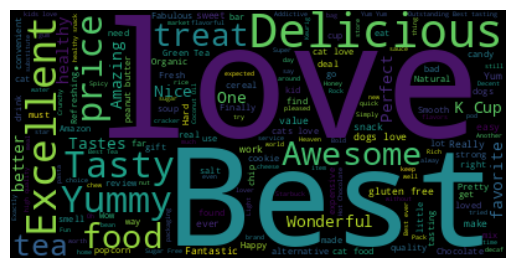

In [49]:
import nltk
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))
stopwords.update(["br", "stuff", "href","good","great", "taste", "product", "flavour","like", "coffee", "dog","flavor","buy"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.Summary)
wordcloud = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

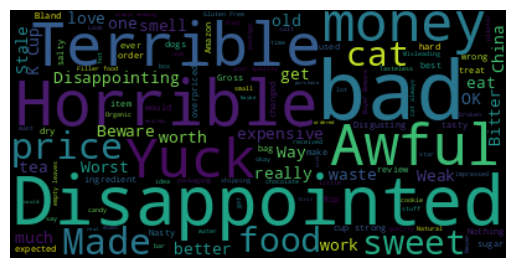

In [50]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = set(stopwords.words('english'))
stopwords.update(["br", "tastes", "href","good","great", "taste", "product", "flavour","like", "coffee", "dog","flavor","buy"])

negreviews = " ".join(review for review in negative.Summary)
wordcloud = WordCloud(stopwords=stopwords).generate(negreviews)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [51]:
import plotly.express as px

# Replace sentiment values properly
df['sentimentt'] = df['sentiment'].map({-1: 'negative', 1: 'positive'})

# Check if sentimentt column exists
if "sentimentt" in df.columns and not df.empty:
    fig = px.histogram(df, x="sentimentt")
    fig.update_traces(marker_color="indianred", marker_line_color='rgb(8,48,107)',
                      marker_line_width=1.5)
    fig.update_layout(title_text='Product Sentiment')
    fig.show(renderer="colab")  # For Google Colab
else:
    print("Column 'sentimentt' not found or DataFrame is empty.")


In [52]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['Text'] = df['Text'].apply(remove_punctuation)
df = df.dropna(subset=['Summary'])
df['Summary'] = df['Summary'].apply(remove_punctuation)

In [53]:
df['combined'] = df['Summary'] + " " + df['Text']
dfNew = df[['combined','sentiment']]

In [54]:
# random split train and test data
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
train_matrix = vectorizer.fit_transform(train['combined'])
test_matrix = vectorizer.transform(test['combined'])


In [65]:
X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [66]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=6000)
print("Training Logistic Regression...")
lr.fit(X_train, y_train)

# Make Predictions
predictions = lr.predict(X_test)

# Evaluate Model
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("="*50)


Training Logistic Regression...

Logistic Regression Classification Report:
              precision    recall  f1-score   support

          -1       0.88      0.83      0.86     17300
           1       0.97      0.98      0.97     93435

    accuracy                           0.96    110735
   macro avg       0.93      0.91      0.92    110735
weighted avg       0.96      0.96      0.96    110735

Confusion Matrix:
[[14437  2863]
 [ 1931 91504]]


In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train Naïve Bayes
nb = MultinomialNB()
print("Training Naïve Bayes...")
nb.fit(X_train, y_train)

# Make Predictions
predictions = nb.predict(X_test)

# Evaluate Model
print("\nNaïve Bayes Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("="*50)


Training Naïve Bayes...

Naïve Bayes Classification Report:
              precision    recall  f1-score   support

          -1       0.62      0.90      0.73     17300
           1       0.98      0.90      0.94     93435

    accuracy                           0.90    110735
   macro avg       0.80      0.90      0.84    110735
weighted avg       0.92      0.90      0.91    110735

Confusion Matrix:
[[15517  1783]
 [ 9494 83941]]


In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
print("Training Decision Tree...")
dt.fit(X_train, y_train)

predictions = dt.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("="*50)


Training Decision Tree...

Decision Tree Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.32      0.45     17300
           1       0.89      0.99      0.93     93435

    accuracy                           0.88    110735
   macro avg       0.84      0.65      0.69    110735
weighted avg       0.87      0.88      0.86    110735

Confusion Matrix:
[[ 5474 11826]
 [ 1376 92059]]


In [84]:
pip install lightgbm


In [73]:
from xgboost import XGBClassifier

# Before fitting the model, replace -1 with 0 in y_train
y_train = y_train.replace(-1, 0)
y_test = y_test.replace(-1, 0)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
print("Training XGBoost...")
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

# Evaluate
print("\nXGBoost Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("="*50)

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:52:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.53      0.66     12822
           1       0.92      0.98      0.95     70189

    accuracy                           0.91     83011
   macro avg       0.89      0.76      0.81     83011
weighted avg       0.91      0.91      0.91     83011

Confusion Matrix:
[[ 6856  5966]
 [ 1110 69079]]


In [74]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Reduce number of estimators (trees) for faster execution
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Reduce trees
print("Training Random Forest...")
rf.fit(X_train, y_train)

# Make Predictions
predictions = rf.predict(X_test)

# Evaluate Model
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("="*50)


Training Random Forest...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12822
           1       0.85      1.00      0.92     70189

    accuracy                           0.85     83011
   macro avg       0.42      0.50      0.46     83011
weighted avg       0.71      0.85      0.77     83011

Confusion Matrix:
[[    0 12822]
 [    0 70189]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:53:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




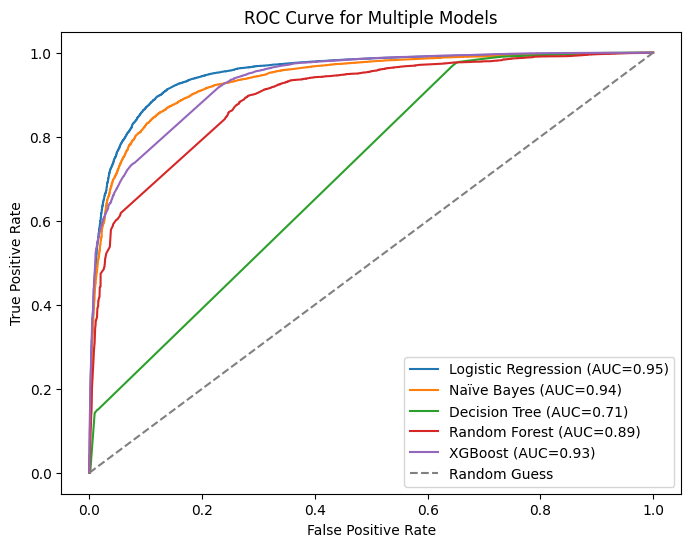

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have train['Summary'] and train['sentiment'] available
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(train['Summary'])
y = train['sentiment'].replace(-1, 0)  # Convert -1 to 0 for binary classification

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=6000),
    "Naïve Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
}

plt.figure(figsize=(8,6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:,1]  # Get positive class probabilities
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={roc_auc:.2f})")

# Random classifier line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Guess")

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multiple Models")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[05:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




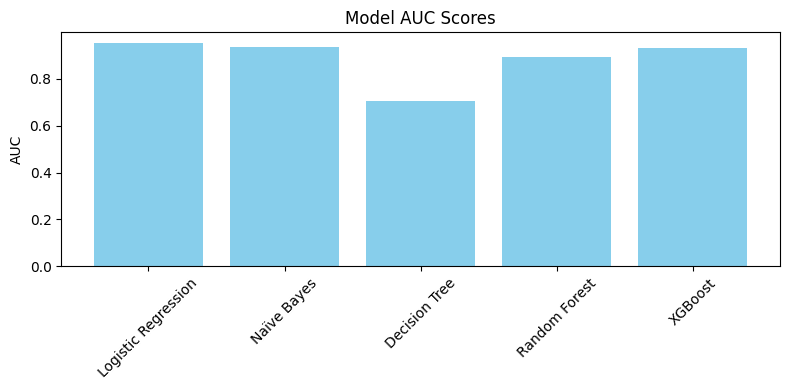

In [79]:
# Store AUC scores for models
auc_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    auc_scores[model_name] = roc_auc

# Plot AUC bar chart
plt.figure(figsize=(8, 4))
plt.bar(auc_scores.keys(), auc_scores.values(), color='skyblue')
plt.title("Model AUC Scores")
plt.ylabel("AUC")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
